In [ ]:
!pip install tensorflow_decision_forests

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers, regularizers, activations
from matplotlib import pyplot as plt
#import tensorflow_decision_forests as tfdf
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [3]:
test_df = pd.read_csv("test2.csv")
train_df = pd.read_csv("train2.csv")
#if data was loaded in some specific order randomize it
train_df = train_df.reindex(np.random.permutation(train_df.index))
#train_df = train_df.drop(['BsmtHalfBath', 'BsmtFinSF2', 'Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)
#test_df = test_df.drop(['BsmtHalfBath', 'BsmtFinSF2', 'Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)
dict_dtypes = train_df.dtypes.to_dict()
train_columns = train_df.columns


In [18]:
train_df = train_df.drop(['MoSold','YrSold', 'OverallCond','MSSubClass'],axis=1)
test_df = test_df.drop(['MoSold','YrSold','OverallCond','MSSubClass'],axis=1)

In [20]:
test_df = test_df.drop(['LandSlope','BsmtFinType2'],axis=1)
train_df = train_df.drop(['LandSlope','BsmtFinType2'],axis=1)

In [19]:
train_df = train_df.drop(['EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'ScreenPorch', '3SsnPorch'],axis=1)
test_df = test_df.drop(['EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'ScreenPorch', '3SsnPorch'],axis=1)

In [ ]:
[['BldgType', 0.17602476324209007],
 ['Condition1', 0.17239779066121796],
 ['BedroomAbvGr', 0.16821315430073983],
 ['cont_conf', 0.16773751637440926],
 ['GarageCond', 0.16282722534961883],
 ['BsmtCond', 0.16065764008975794],
 ['GarageQual', 0.1566925313754637],
 ['ExterCond', 0.13802572133110855],
 ['Functional', 0.12558621673608258]]

In [106]:
norm_train.norm_df = norm_train.norm_df.drop(['BldgType', 'Condition1', 'BedroomAbvGr', 'cont_conf', 'GarageCond','BsmtCond','GarageQual','ExterCond','Functional'],axis=1)
norm_test.norm_df = norm_test.norm_df.drop(['BldgType', 'Condition1', 'BedroomAbvGr', 'cont_conf', 'GarageCond','BsmtCond','GarageQual','ExterCond','Functional'],axis=1)

SYNTHETIC FEATURE FROM PORCH COLUMNS

In [14]:
train_df = train_df.drop(['BsmtHalfBath', 'BsmtFinSF2', 'Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)
test_df = test_df.drop(['BsmtHalfBath', 'BsmtFinSF2', 'Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)

In [13]:
train_df['cont_conf'] = train_df['LotConfig'] + train_df['LandContour']
test_df['cont_conf'] = test_df['LotConfig'] + test_df['LandContour']

In [15]:
train_df = train_df.drop(['LotConfig', 'LandContour'],axis=1)
test_df = test_df.drop(['LotConfig', 'LandContour'],axis=1)

In [16]:
train_df = train_df.drop(['GarageYrBlt', 'YearBuilt'],axis=1)
test_df = test_df.drop(['GarageYrBlt', 'YearBuilt'],axis=1)

In [12]:
# Total amount of baths in the house
train_df['TotalBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']*0.5 + train_df['FullBath'] + train_df['HalfBath']*0.5
test_df['TotalBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']*0.5 + test_df['FullBath'] + test_df['HalfBath']*0.5

# Total square feet of porch
train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']

# Total square feet of house
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']


train_df['RemodAfter'] = train_df['YearRemodAdd'] - train_df['YearBuilt']
test_df['RemodAfter'] = test_df['YearRemodAdd'] - test_df['YearBuilt']
test_df.loc[test_df.RemodAfter<0,'RemodAfter'] = 0

train_df['AgeSoldBefore'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['AgeSoldBefore'] = test_df['YrSold'] - test_df['YearBuilt']


train_df['Age_Garage_Sold'] = train_df["YrSold"] - train_df['GarageYrBlt']
test_df['Age_Garage_Sold'] = test_df["YrSold"] - test_df['GarageYrBlt']

In [ ]:
rank_correlation

In [21]:
#calculate the correlation coefficient for each feature vs sale price 
rank_correlation = []

for col in train_df.columns:
  if train_df[col].dtype != 'object':
    rank_correlation.append([col, train_df["SalePrice"].corr(train_df[col])])
sort1 = sorted(rank_correlation, 
                key=lambda x: x[1], reverse=True)
sort1

[['SalePrice', 1.0],
 ['TotalSF', 0.8118832510611188],
 ['OverallQual', 0.7909816005838043],
 ['GrLivArea', 0.7149785649266225],
 ['Neighborhood', 0.6968822397567909],
 ['ExterQual', 0.6826392416562594],
 ['KitchenQual', 0.6595997207286632],
 ['BsmtQual', 0.6440193059937251],
 ['GarageCars', 0.6404091972583529],
 ['TotalBsmtSF', 0.6328508787216554],
 ['TotalBath', 0.6317310679319875],
 ['GarageArea', 0.6307834851113622],
 ['1stFlrSF', 0.6162290432160192],
 ['FullBath', 0.560663762748445],
 ['TotRmsAbvGrd', 0.5337231555820282],
 ['GarageFinish', 0.5131053120878734],
 ['YearRemodAdd', 0.5071009671113863],
 ['Foundation', 0.5055031712897446],
 ['MasVnrArea', 0.47783282650052666],
 ['Fireplaces', 0.46692883675152735],
 ['GarageType', 0.44559752604985575],
 ['MasVnrType', 0.4290197925171347],
 ['HeatingQC', 0.4276487073988039],
 ['BsmtFinSF1', 0.400666262496497],
 ['LotArea', 0.3849899708119047],
 ['LotFrontage', 0.38162252653741546],
 ['Exterior1st', 0.36796066457408505],
 ['SaleType', 0.3

SQUEEZE OUTLIERS


In [ ]:
def categorical_price(col):
  plt.title(col)
  mean = train_df.groupby(col).mean()
  mean = mean.sort_values(by='SalePrice')
  x = mean['SalePrice'].keys()
  height = mean['SalePrice']
  plt.bar(x, height, width=0.8, bottom=None, align='center', data=None)
  plt.show()
#categorical_price('Street')

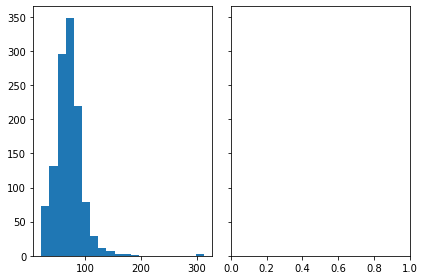

In [ ]:
def show_dist(col):
  n_bins = 20

  # Generate two normal distributions
  dist1 = train_df[col]
  #dist2 = 0.4 * rng.standard_normal(N_points) + 5

  fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)

  # We can set the number of bins with the *bins* keyword argument.
  axs[0].hist(dist1, bins=n_bins)
  #axs[1].hist(dist2, bins=n_bins)
  plt.show()
show_dist('LotFrontage')

In [4]:
#creates dict of dict to rank value of each categorical val based on mean sale price
col_key_dict = {}
def code_by_rank(df):
  for col in df:
    if df[col].dtype == 'object':
      mean = df.groupby(col).mean()
      mean = mean.sort_values(by='SalePrice')
      key_values = {}
      i=0
      for val in mean['SalePrice'].keys():
        key_values[val] = i
        i+=1
      col_key_dict[mean['SalePrice'].keys().name] = key_values
  print(col_key_dict)
code_by_rank(train_df)

{'MSZoning': {'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}, 'Street': {'Grvl': 0, 'Pave': 1}, 'Alley': {'Grvl': 0, 'Pave': 1}, 'LotShape': {'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}, 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}, 'Utilities': {'NoSeWa': 0, 'AllPub': 1}, 'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'FR3': 3, 'CulDSac': 4}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'Neighborhood': {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}, 'Condition1': {'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRNe': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8}, 'Condition2': {'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7

In [ ]:
col_key_dict['MSZoning']

{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

In [10]:
col_key_dict['FireplaceQu']

{'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

In [10]:
for key, value in col_key_dict.items():
  train_df[key].replace(col_key_dict[key],inplace=True)
  test_df[key].replace(col_key_dict[key],inplace=True)
  #print(key, value)
  #train_df = train_df.loc[train_df[key] == value, key] = col_key_dict[key][value]
  #test_df = test_df.loc[test_df[key] == value, key] = col_key_dict[key][value]

In [21]:
for col in train_df:
  if train_df[col].dtype == 'object':
    print(col)

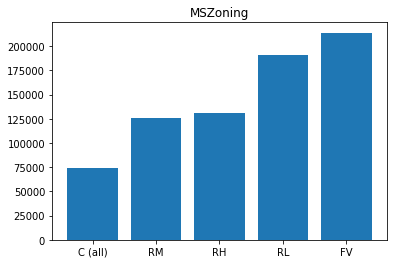

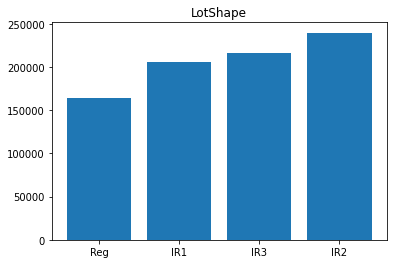

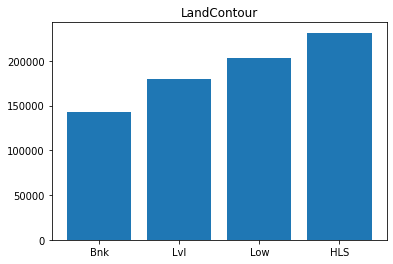

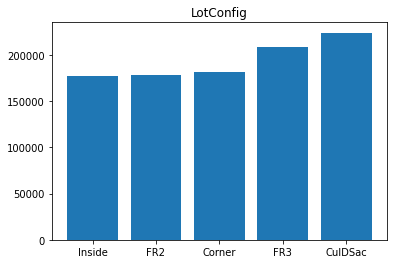

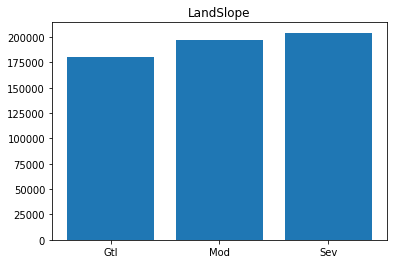

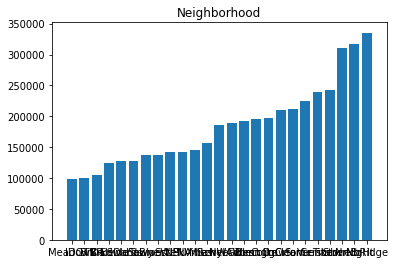

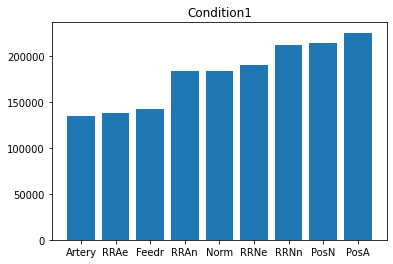

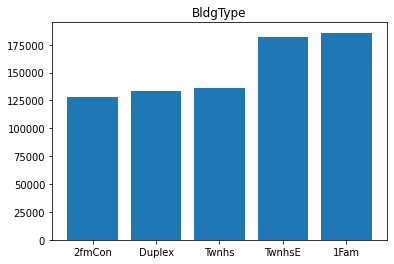

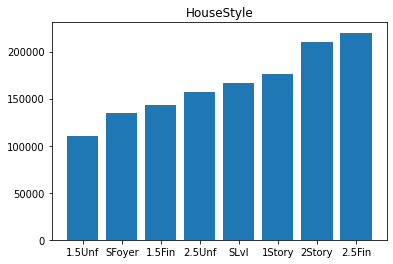

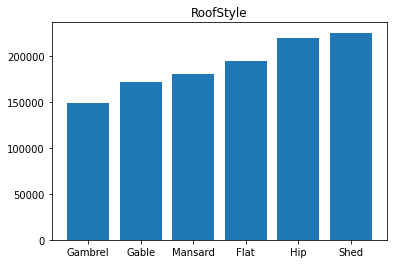

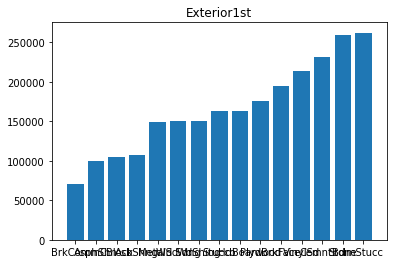

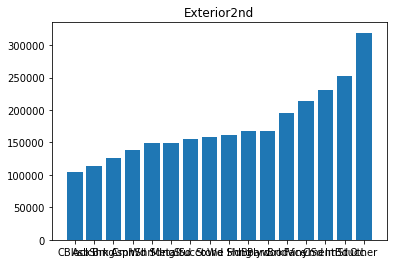

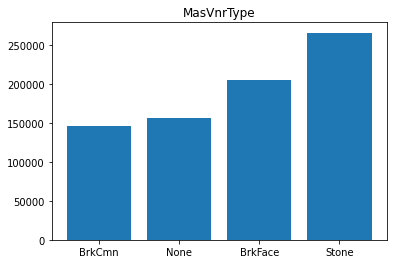

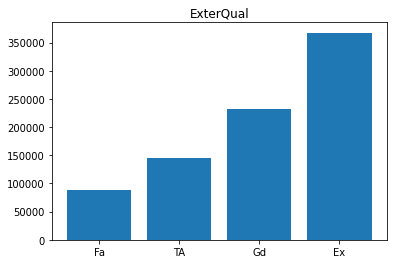

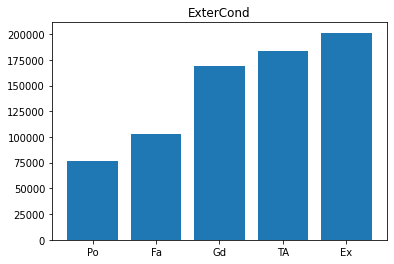

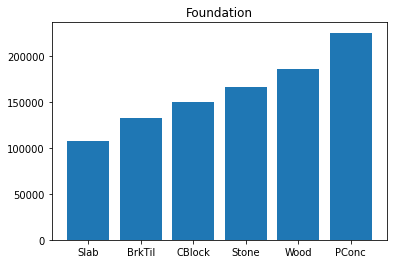

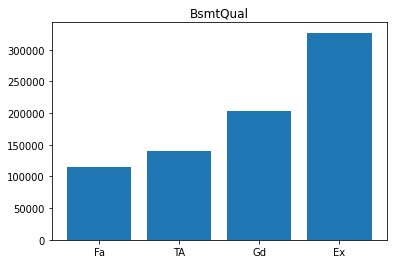

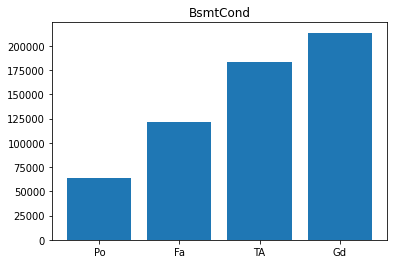

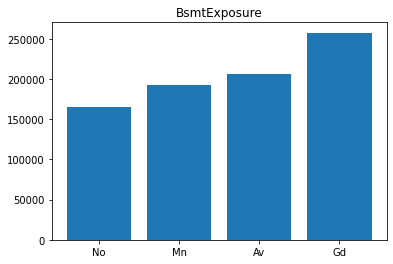

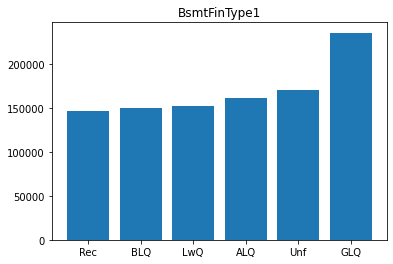

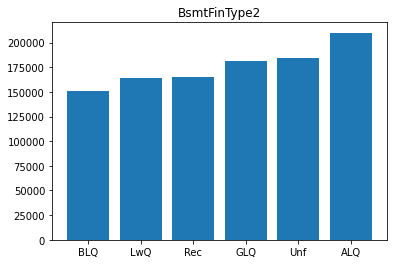

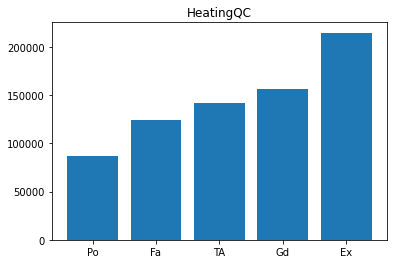

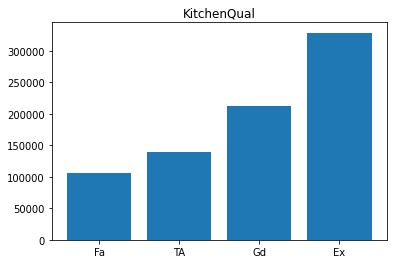

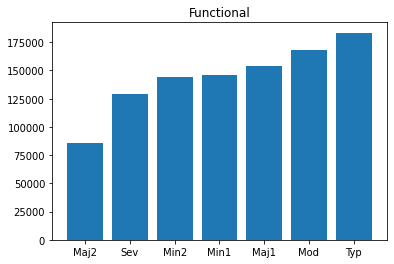

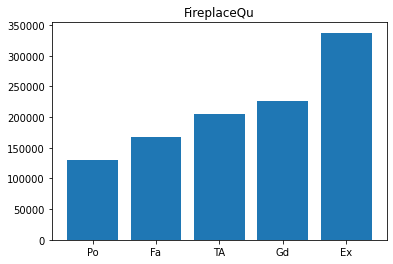

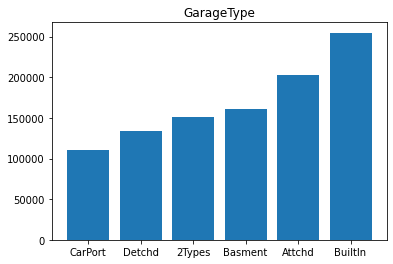

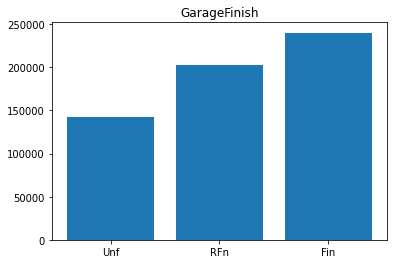

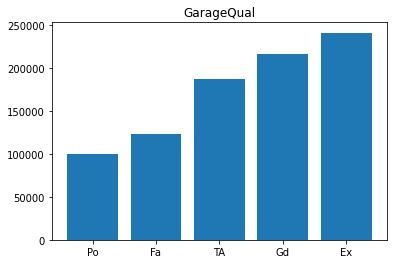

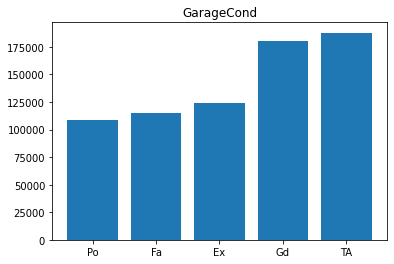

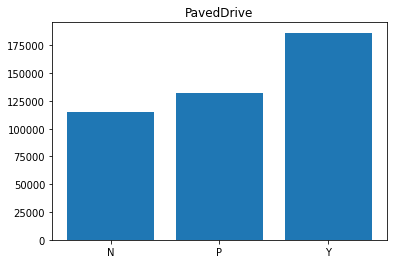

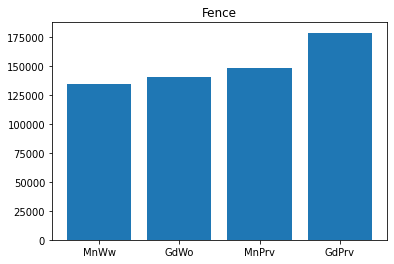

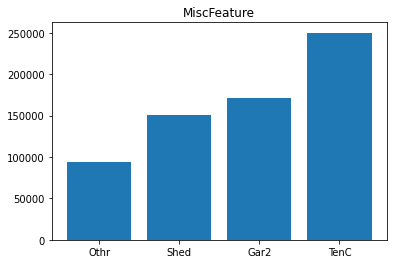

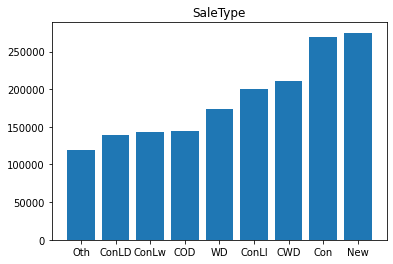

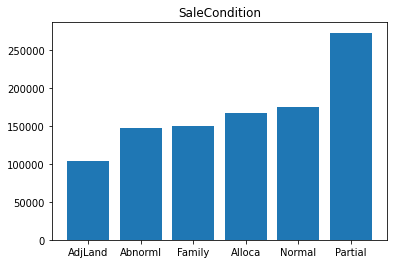

In [ ]:
for col in train_df:
  if train_df[col].dtype == 'object':
    categorical_price(col) 

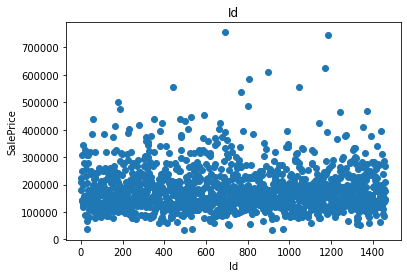

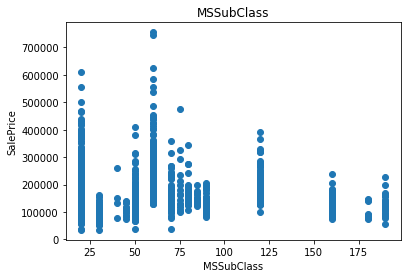

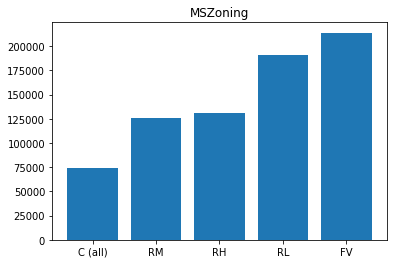

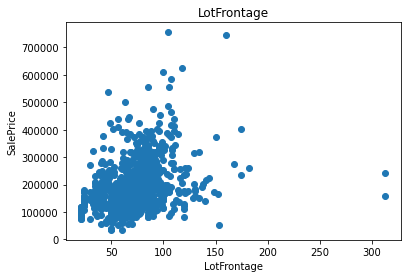

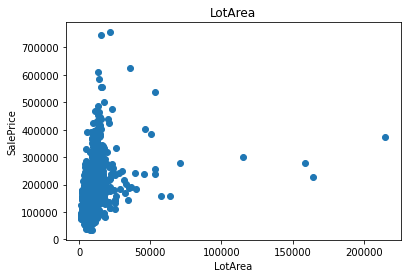

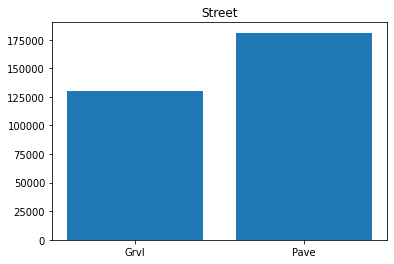

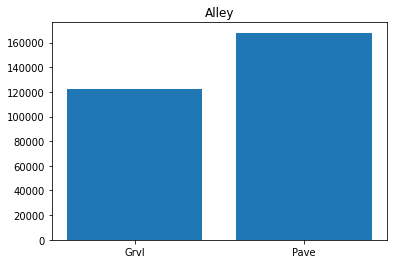

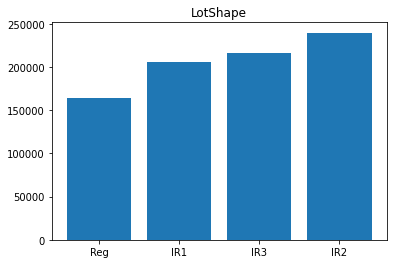

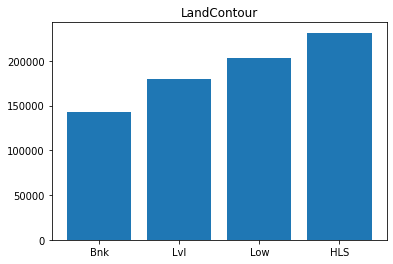

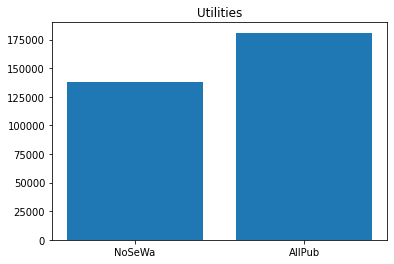

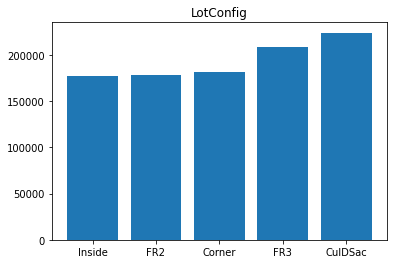

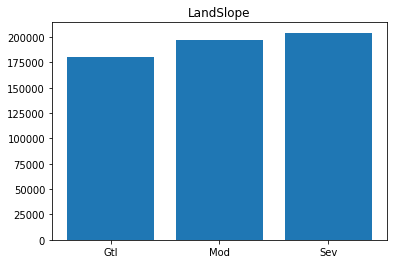

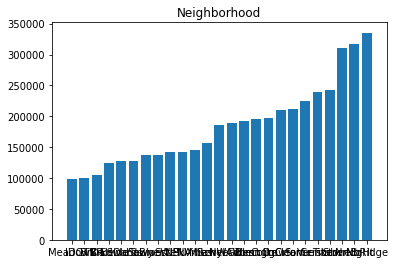

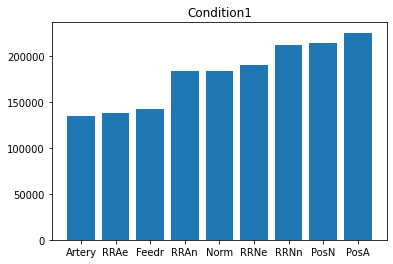

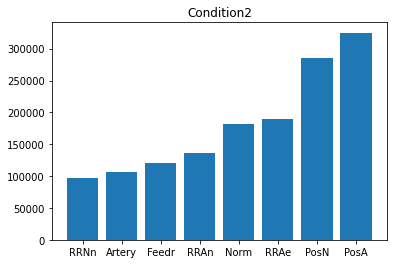

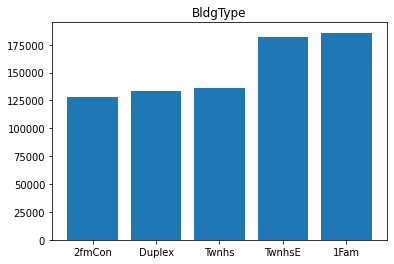

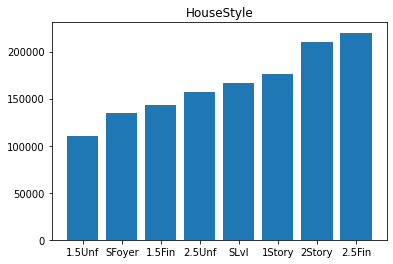

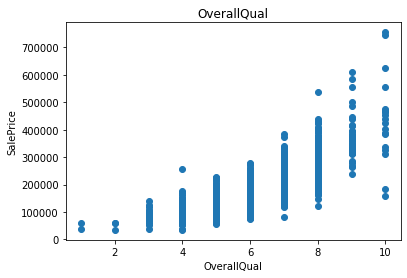

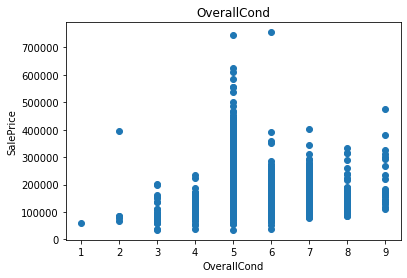

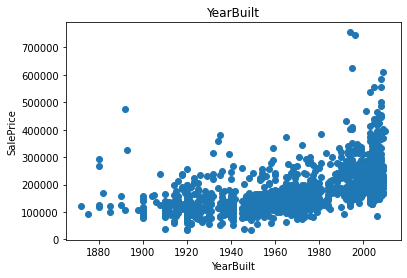

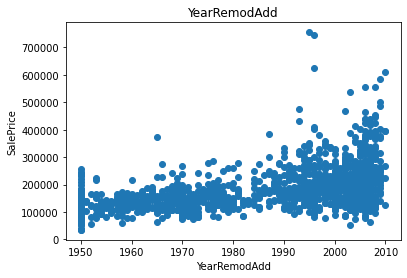

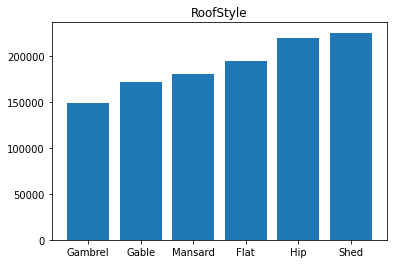

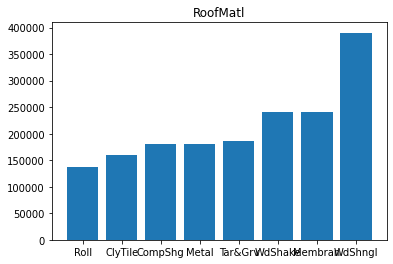

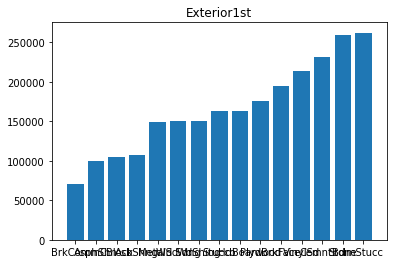

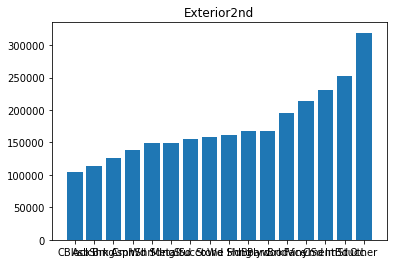

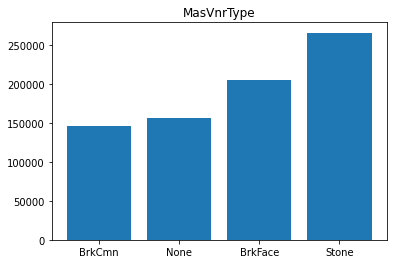

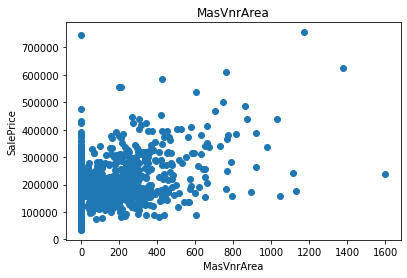

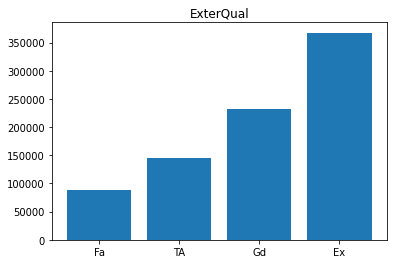

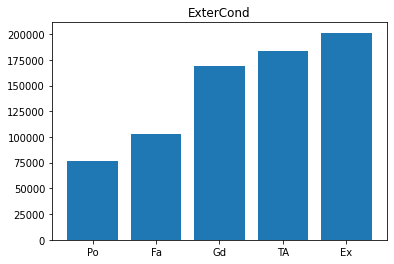

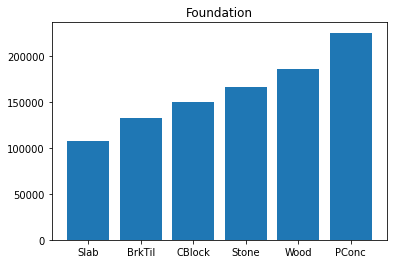

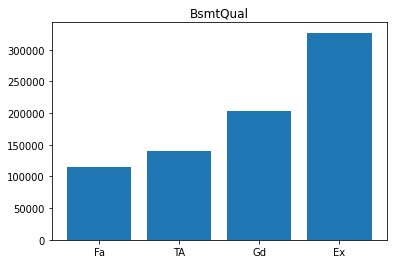

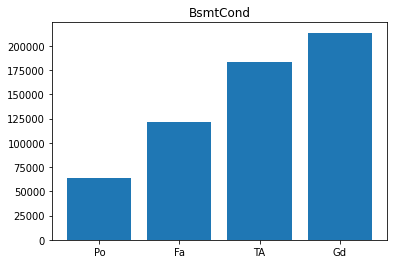

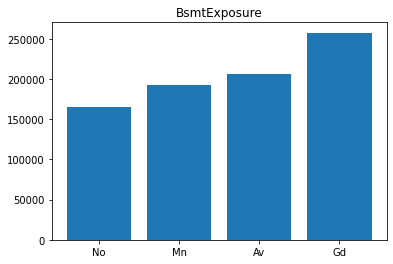

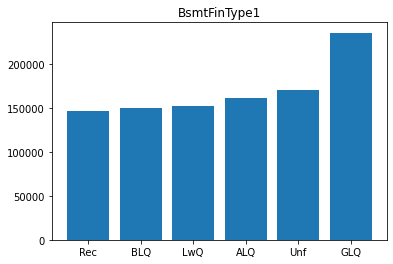

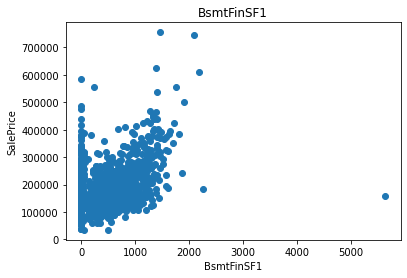

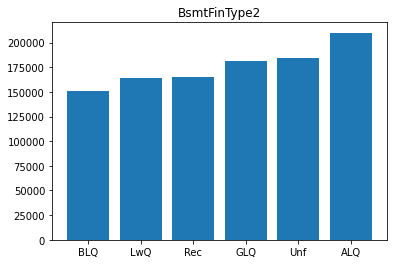

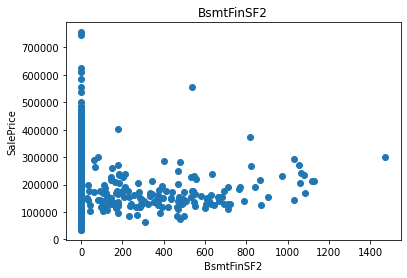

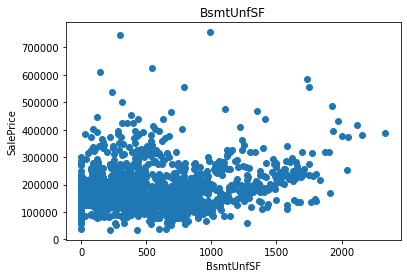

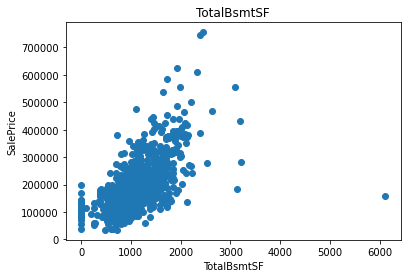

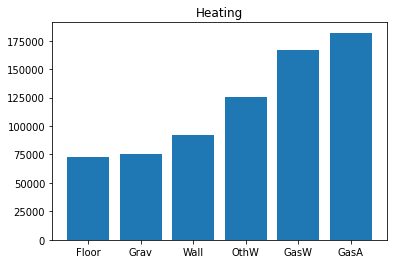

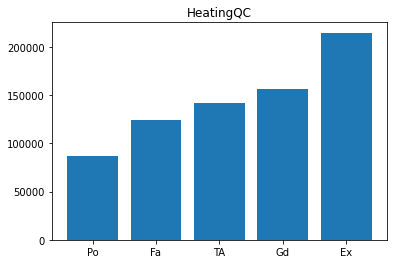

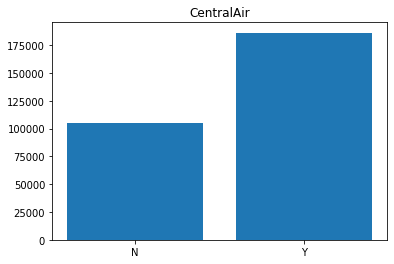

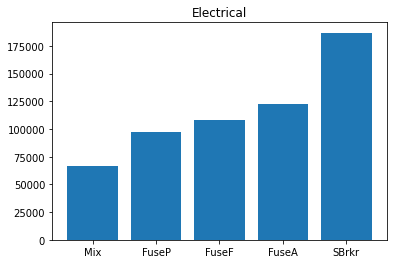

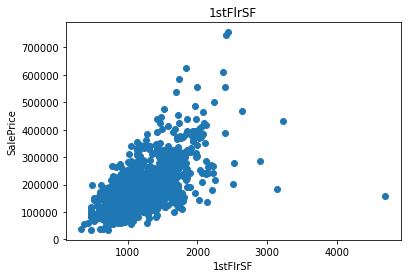

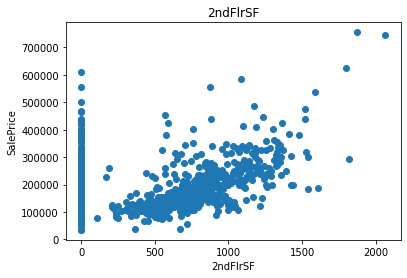

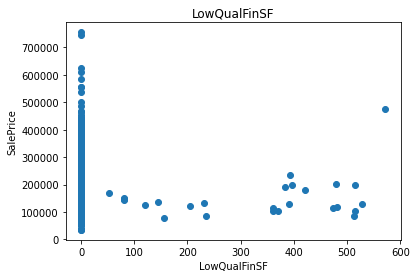

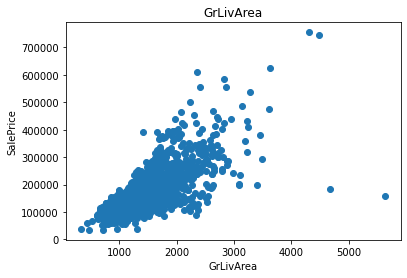

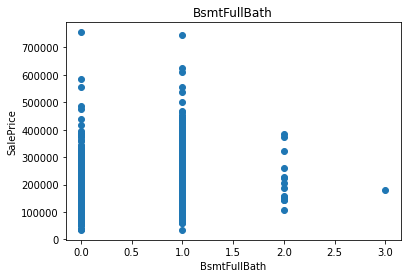

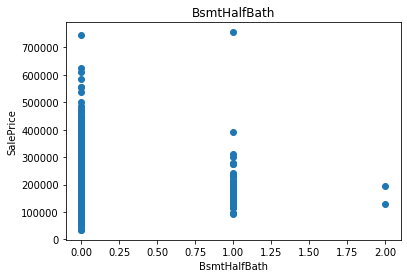

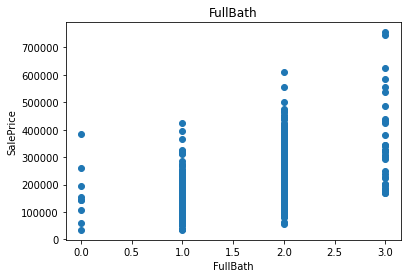

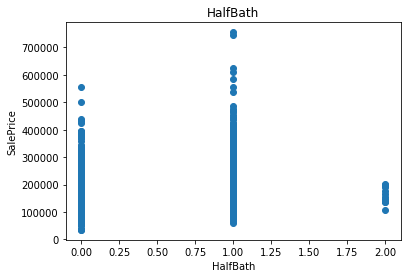

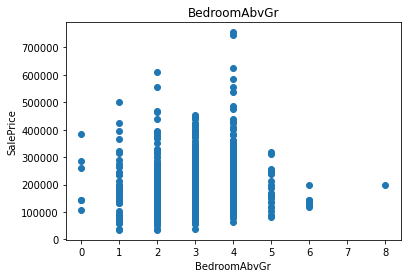

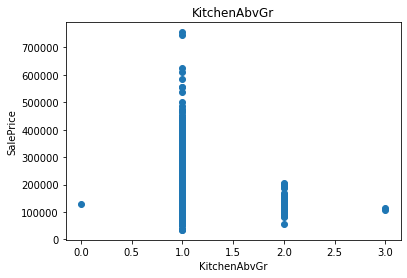

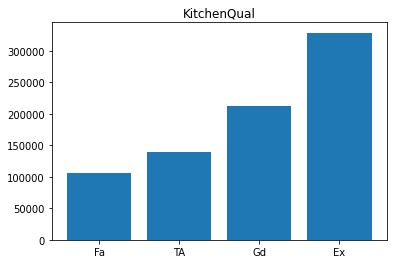

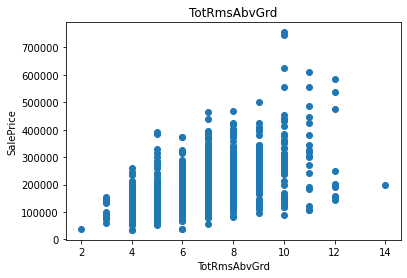

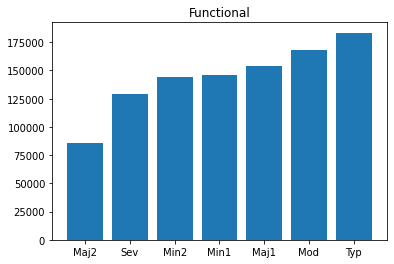

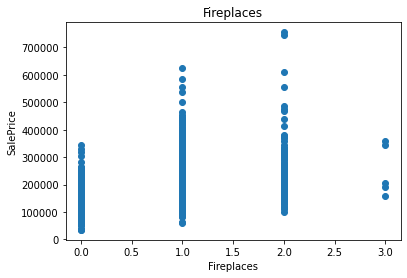

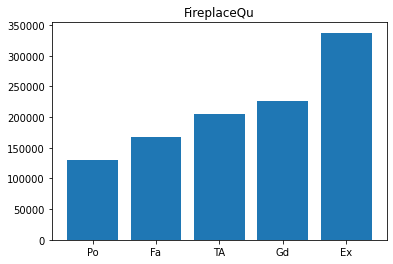

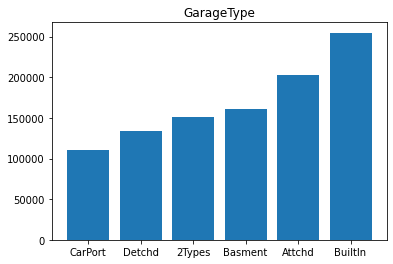

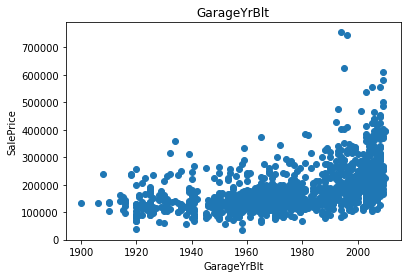

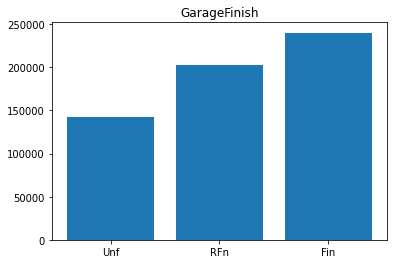

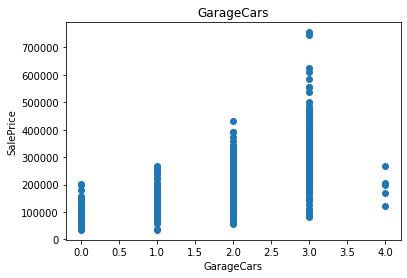

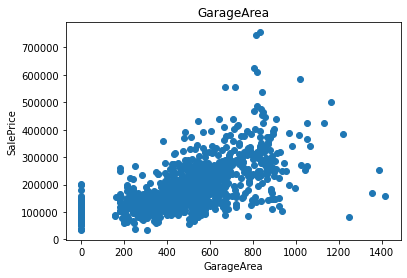

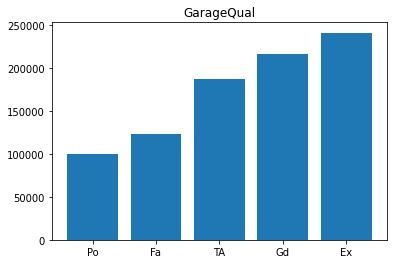

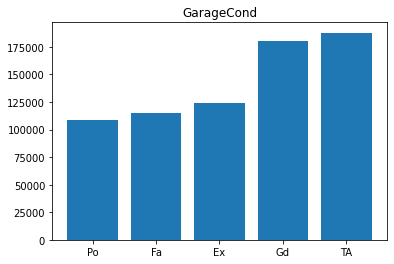

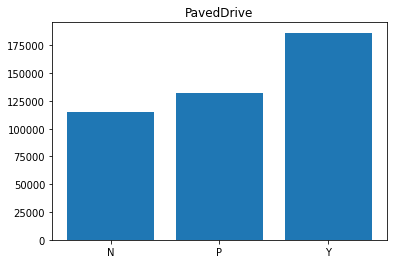

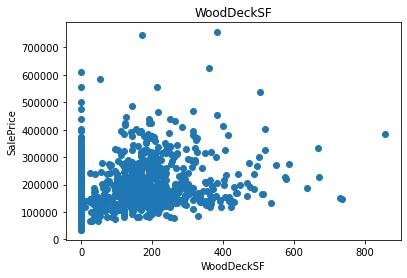

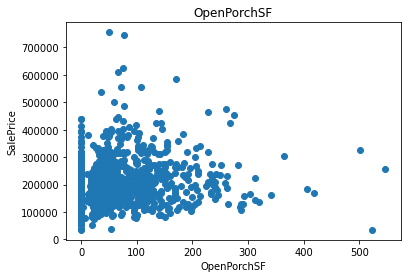

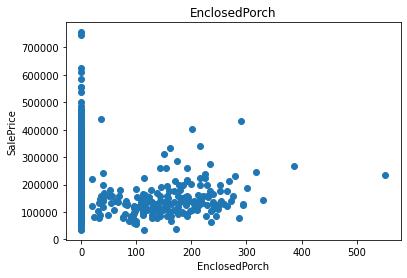

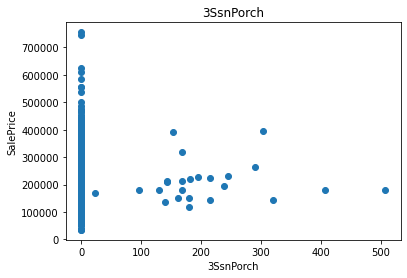

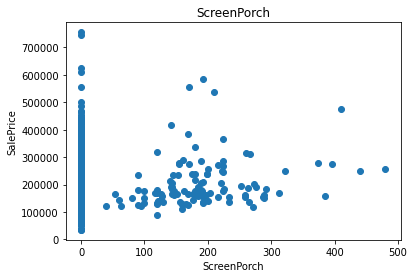

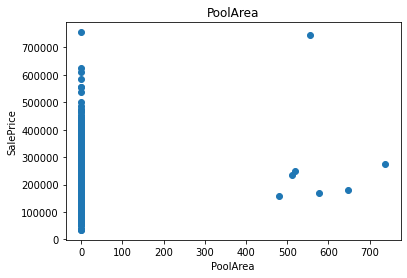

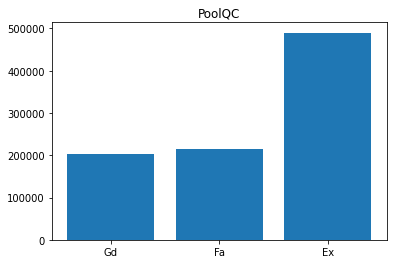

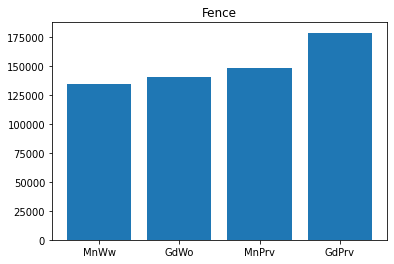

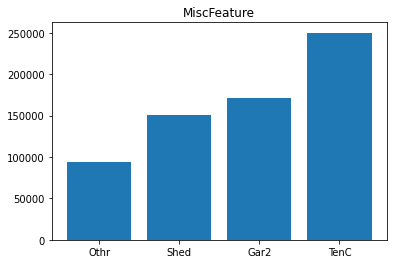

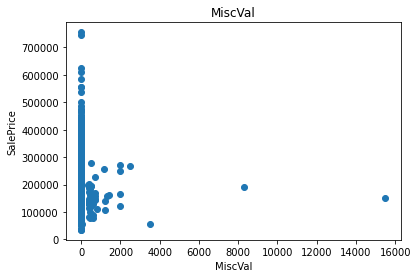

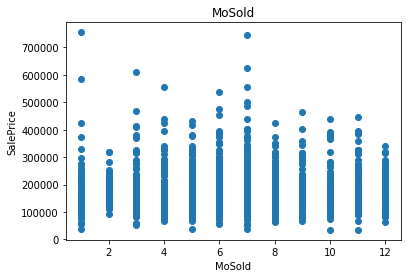

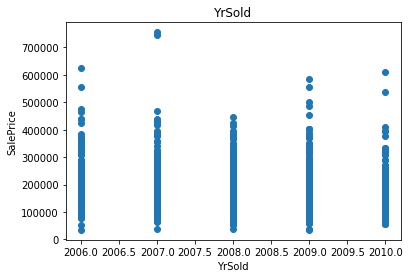

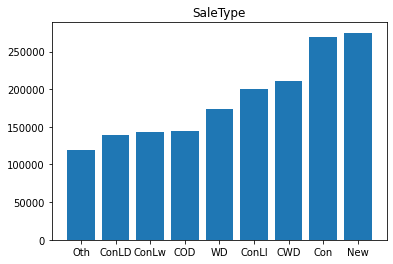

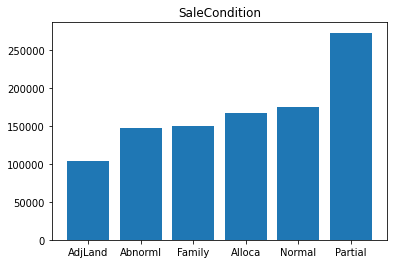

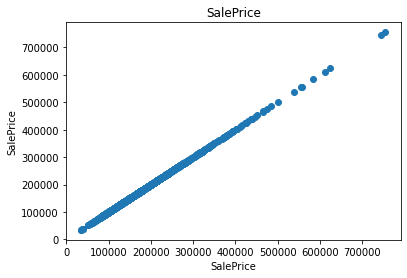

In [ ]:
for col in train_df:
  if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
    feature_price(col)
  else:
    categorical_price(col) 


In [ ]:
norm_train.norm_df = norm_train.norm_df.drop(['BsmtHalfBath', 'BsmtFinSF2'],axis=1)
norm_test.norm_df = norm_test.norm_df.drop(['BsmtHalfBath', 'BsmtFinSF2'],axis=1)

In [ ]:
for col in train_df:
  if train_df[col].dtype == 'object':
    mean = train_df.groupby(col).mean()
    mean = mean.sort_values(by='SalePrice')
    print(mean['SalePrice'].keys())
    for row in train_df[col]:
      train_df.apply()



CHECK FOR MISSING VALUES

In [ ]:
def missing_vals(columns):
  for column in columns:
    print(f'Column name: {column}, ', train_df[column].isna().sum())
columns = train_columns
missing_vals(columns)

CHECK IF THERE ARE ENOUGH UNIQUE VALUES

In [ ]:
def unique_values(columns):
  for column in columns:
    print(f'Column:{column}, ', train_df[column].value_counts())
unique_values(columns)

In [ ]:
#95% values are na
train_df = train_df.drop(['Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)
test_df = test_df.drop(['Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)

GET DUMMIES

In [ ]:
train_df_dummies = pd.get_dummies(train_df['SaleType'], prefix='SaleType', dummy_na=True)

In [ ]:
train_df_dummies

In [ ]:
df_with_dummies_and_original.columns

In [ ]:
norm_train.norm_df = pd.concat([norm_train.norm_df, train_df_dummies], axis=1)

In [5]:
class StandardDF:
  def __init__(self, df):
    self.name = df
    self.metrics_column_names = {}
    all_metrics = []
    self.norm_df = pd.DataFrame()
    
  def standardize_columns(self, df, columns, fill_na=None):
    for column in columns:
      self.column = (df[column] - df[column].mean())/df[column].std()
      self.norm_df[column] = self.column
      all_metrics = [df[column].mean(), df[column].std()]
      self.metrics_column_names[column] = all_metrics
      if fill_na is not None:
        self.norm_df[column] = self.norm_df[column].fillna(fill_na)
  def get_dummies(self, df, columns):
    for column in columns:
      df_dummies = pd.get_dummies(df[column], prefix=column, dummy_na=True)
      self.norm_df = pd.concat([self.norm_df, df_dummies], axis=1)
    #DE-STANDARDIZE COLUMN
  def de_standardize(self, column):
    return self.norm_df[column] * self.metrics_column_names[column][1] + self.metrics_column_names[column][0]


In [ ]:
train_df.GrLivArea.fillna(train_df['GrLivArea'].mean(),inplace=True)

In [23]:
norm_train = StandardDF(train_df)
norm_test = StandardDF(test_df)

In [ ]:
norm_train.standardize_columns(train_df, ['TotalBsmtSF'])

In [ ]:
dict_dtypes.items()

In [22]:
dict_dtypes = train_df.dtypes.to_dict()
numerical_cols = []
categorical_cols = []
for key, value in dict_dtypes.items():
  if value != 'object':
    numerical_cols.append(key)
  if value == 'object':
    categorical_cols.append(key)
  
print(categorical_cols)
  
      

[]


In [ ]:
def get_dummies(df, columns):
  for column in columns:
    df_dummies = pd.get_dummies(df[column], prefix=column, dummy_na=True)
    df = pd.concat([df, df_dummies], axis=1)

In [ ]:
numerical_cols.remove('SalePrice')
numerical_cols.append('SalePrice')
numerical_cols

In [ ]:
numerical_cols[:]

In [29]:
norm_train.standardize_columns(train_df, numerical_cols)
norm_test.standardize_columns(test_df, numerical_cols[:-1])
#norm_train.get_dummies(train_df, categorical_cols)
#norm_test.get_dummies(test_df, categorical_cols)

In [ ]:
norm_test.norm_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=274)

In [ ]:
for col in norm_train.norm_df.columns:
  if col not in norm_test.norm_df.columns:
    print (col)

SalePrice


In [ ]:
norm_train.norm_df.Exterior1st_[norm_train.norm_df.Exterior1st_==1]

1152    1
1187    1
1024    1
Name: Exterior1st_, dtype: uint8

In [ ]:
norm_train.norm_df = norm_train.norm_df.drop(['Exterior1st_'], axis=1)

REPLACE CATEGORICAL DATA IF THERE ARE NO INSTANCES IN THE TEST SET

In [6]:
redo_sparse = {'GarageQual':['Ex', 'Gd'], 'Exterior1st': ['Stone', 'MetalSd'], 'Exterior1st': ['ImStucc','MetalSd'], 'Exterior2nd': ['Other','MetalSd'], 'MiscFeature': ['TenC','Gar2'], 'HouseStyle': ['2.5Fin','2Story']}

In [9]:
def un_sparse(df, col_vals):
  for key, value in col_vals.items():
    train_df.loc[train_df[key]==value[0], key] = value[1]
  train_df.loc[train_df['Exterior1st']=='Stone', 'Exterior1st'] = None
un_sparse(train_df, redo_sparse)

In [ ]:
train_df['Exterior2nd']

829     MetalSd
269     HdBoard
796     Plywood
159     VinylSd
1076    Wd Sdng
         ...   
275     Wd Sdng
993     VinylSd
955     MetalSd
569     MetalSd
452     VinylSd
Name: Exterior2nd, Length: 1460, dtype: object

In [ ]:
redo_sparse.items()

dict_items([('GarageQual', ['Ex', 'Gd']), ('Exterior1st', ['ImStucc', '']), ('Exterior2nd', ['Other', '']), ('MiscFeature', ['TenC', 'Gar2']), ('HouseStyle', ['2.5Fin', '2Story'])])

In [ ]:
train_df.loc[train_df['Exterior2nd']=='Other']

In [ ]:
norm_train.norm_df.head

FILL NA VALUES

In [80]:
norm_train.norm_df
fill_na = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in fill_na:
  norm_train.norm_df[col].fillna(norm_train.norm_df[col].mean(),inplace=True)
  norm_test.norm_df[col].fillna(norm_test.norm_df[col].mean(),inplace=True)

SQUEEZE OUTLIERS
coumns to squeeze based on distribution charts above:
['LotFrontage': 125, 'LotArea':40000, 'MasVnrArea':800, 'BsmtFinSF1':1800, 'TotalBsmtSF':2000, '1stFlrSF':2000, '2ndFlrSF':1500, 'GrLivArea':3200, 'GarageArea': 1000]

In [7]:
squeeze_columns = {'OpenPorchSF':200, 'ScreenPorch':200,'EnclosedPorch':200, '3SsnPorch': 200, 'LotFrontage': 125, 'LotArea':40000, 'MasVnrArea':800, 'BsmtFinSF1':1800, 'TotalBsmtSF':2000, '1stFlrSF':2000, '2ndFlrSF':1500, 'GrLivArea':3200, 'GarageArea': 1000}

In [8]:
def squeeze_cols(squeeze_columns):
  for key, value in squeeze_columns.items():
    train_df.loc[train_df[key]>value, key] = value
    test_df.loc[train_df[key]>value, key] = value
squeeze_cols(squeeze_columns)

In [ ]:
train_df['LotFrontage'][train_df['LotFrontage']>=125]

In [ ]:
norm_train.norm_df['LotArea'][norm_train.norm_df['LotArea']>=2]

In [ ]:
train_df['LotArea'].mean()

In [ ]:
norm_train.norm_df.max()

CHECK FOR NULL VALUES IN DF

In [83]:
for col in norm_test.norm_df.columns:
  if norm_test.norm_df[col].isnull().values.any():
    print(col)

In [30]:

fill_test = ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','GarageCars','GarageArea']
for col in fill_test:
  norm_test.norm_df[col].fillna(0,inplace=True)

In [31]:
for col in norm_test.norm_df.columns:
  if norm_test.norm_df[col].isnull().values.any():
    norm_train.norm_df[col].fillna(norm_train.norm_df[col].mean(),inplace=True)
    norm_test.norm_df[col].fillna(norm_test.norm_df[col].mean(),inplace=True)

In [ ]:
norm_data.de_standardize('GrLivArea')

In [ ]:
norm_train_noprices.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=274)

In [ ]:
norm_train.norm_df.SalePrice

TAKE OUT SALE PRICE FROM FEATURES

In [ ]:
norm_train_noprices = norm_train.norm_df.loc[:, norm_train.norm_df.columns != 'SalePrice']

In [ ]:
tensor_fill = [i[0] for i in enumerate(norm_train_noprices.columns)]
x = tf.gather(norm_train_noprices, indices=tensor_fill, axis=1)
#y = tf.gather(norm_train.norm_df['SalePrice'], [0], axis=0)

In [ ]:
y = norm_train.norm_df.pop('SalePrice')

In [ ]:
x = tf.convert_to_tensor(norm_train.norm_df)

In [ ]:
norm_train.norm_df.loc[:, 'SalePrice']

In [ ]:
x_hmm = norm_train.norm_df.loc[:, norm_train.norm_df.columns != 'SalePrice']
x_hmm

In [ ]:
x_hmm['GrLivArea']

In [33]:
x = tf.convert_to_tensor(x_hmm)

In [34]:
y = tf.convert_to_tensor(norm_train.norm_df.loc[:, 'SalePrice'])

In [ ]:
new_tf_dataset = tf.data.Dataset.from_tensor_slices((norm_train.norm_df.values, y.values))

In [ ]:
for features, targets in new_tf_dataset.take(5):
  print ('Features: {}, Target: {}'.format(features, targets))

In [ ]:
from tensorflow.keras import layers


In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(x.get_shape()[1],))
model.add(layers.Dense(200, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model.add(layers.Dense(100, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model.add(layers.Dense(50, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model.add(layers.Dense(10, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model.add(layers.Dense(10, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model.add(layers.Dense(1))
optimizer=tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())

#11/11 [==============================] - 1s 101ms/step - loss: 0.0010 - val_loss: 0.1414

In [35]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(x.get_shape()[1],))
model2.add(layers.Dense(100, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model2.add(layers.Dense(50, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model2.add(layers.Dense(10, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model2.add(layers.Dense(10, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model2.add(layers.Dense(10, activation=activations.relu, activity_regularizer=regularizers.L2(1e-5)))
model2.add(layers.Dense(1))
optimizer=tf.keras.optimizers.Adam()
model2.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError())


Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 0.1717 - val_loss: 0.3549
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1708 - val_loss: 0.3546
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1697 - val_loss: 0.3538
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1689 - val_loss: 0.3524
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.1681 - val_loss: 0.3513
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1669 - val_loss: 0.3502
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1659 - val_loss: 0.3499
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1651 - val_loss: 0.3480
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1641 - val_loss: 0.3463
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1632 - val_loss: 0.3455
Epoch 11

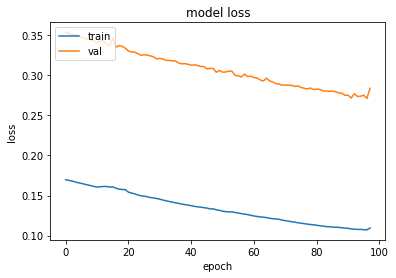

In [43]:
history = model.fit(x, y, batch_size=100, epochs=100, validation_split = 0.3)
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X = norm_train.norm_df.iloc[:, :]

In [ ]:
norm_train.norm_df['SalePrice']

829    -0.421955
269    -0.414403
796    -0.471048
159     1.750685
1076   -0.137473
          ...   
275     0.303097
993    -0.088381
955    -0.452166
569    -0.565959
452     0.290510
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
X = X.drop(['SalePrice'], axis=1)

In [ ]:
norm_train.norm_df.values

array([[ 7.33498308e-02, -1.22762379e-16, -1.11821353e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.99457026e-01, -1.39726810e+00, -9.01219060e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.72263882e-01,  5.06548324e-01,  2.12512928e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.72263882e-01, -4.45359886e-01, -6.70457246e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.72263882e-01,  3.05942189e-02, -4.14503933e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.91019097e+00, -2.30158089e+00, -1.56735150e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

params = {
    "n_estimators": 1000,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.005,
    "loss": "squared_error",
}

The mean squared error (MSE) on test set: 0.0249

In [ ]:
!pip install catboost

In [67]:
from sklearn.linear_model import Ridge, ElasticNet,  Lasso, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#from catboost import CatBoostRegressor
import xgboost as xg
from sklearn import linear_model

In [44]:
y= norm_train.norm_df.loc[:, 'SalePrice']
X= norm_train.norm_df.loc[:, norm_train.norm_df.columns != 'SalePrice']

In [ ]:
for col in norm_train.norm_df:
  if norm_train.norm_df[col].max() >= 5:
    print(col, norm_train.norm_df[col].max())

SalePrice 7.100466169112883


In [ ]:
squeeze_std_cols = []
for col in X.columns:
  if X[col].max() > 4:
    squeeze_std_cols.append(col)
print(squeeze_std_cols)

['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


In [ ]:
squeeze_std_cols

<function __main__.squeeze_std_cols(squeeze_columns)>

In [ ]:
def squeeze_std_columns(squeeze_std_cols):
  for col in squeeze_std_cols:
    norm_train.norm_df.loc[norm_train.norm_df[col]>4, col] = 4
    norm_test.norm_df.loc[norm_test.norm_df[col]>4, col] = 4
squeeze_std_columns(squeeze_std_cols)

In [ ]:
norm_train.norm_df.loc[:, norm_train.norm_df.columns != 'SalePrice']

      Iter       Train Loss   Remaining Time 
         1           1.0217           14.27s
         2           1.0142           15.86s
         3           1.0068           15.57s
         4           0.9994           15.67s
         5           0.9921           15.59s
         6           0.9849           15.43s
         7           0.9777           15.94s
         8           0.9705           15.94s
         9           0.9634           16.07s
        10           0.9564           16.15s
        20           0.8892           15.30s
        30           0.8274           15.45s
        40           0.7707           15.19s
        50           0.7183           15.18s
        60           0.6699           14.88s
        70           0.6250           14.33s
        80           0.5835           13.72s
        90           0.5451           13.24s
       100           0.5094           12.80s
       200           0.2628           10.36s
       300           0.1403            9.03s
       40

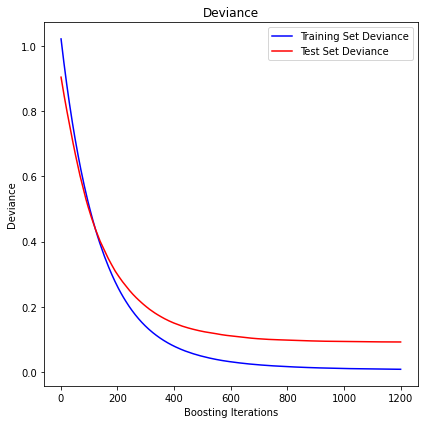

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
params = {
    "n_estimators": 1200,
    "max_depth": 6,
    "min_samples_split": 18,
    "learning_rate": 0.004,
    "loss": "squared_error",
    'verbose':1
}
reg = GradientBoostingRegressor(**params
)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


LASSO REGRESSION

In [109]:
lasso = linear_model.Lasso(alpha=.004)
lasso.fit(X, y)
lasso.score(X, y)

0.8549982877826966

In [ ]:
for i in range(5):
  print(norm_test.norm_df[i:i+1])

In [110]:
results1 = lasso.predict(norm_test.norm_df[:])

In [117]:
results2 = reg.predict(norm_test.norm_df[:])

In [118]:
results3 = model.predict(norm_test.norm_df[:])

46/46 [==============================] - 0s 2ms/step


In [125]:
i=0
for a in results2:
  results3[i] = (results3[i] + a)/2
  i+=1
results3

array([[-0.69948816],
       [-0.24868546],
       [-0.02166193],
       ...,
       [-0.40686888],
       [-0.7312826 ],
       [ 0.38040778]], dtype=float32)

In [126]:
results

array([-0.82147848,  0.01760645, -0.00539069, ..., -0.21707299,
       -0.69622574,  0.60853721])

In [127]:
real_results = results * norm_train.metrics_column_names['SalePrice'][1] + norm_train.metrics_column_names['SalePrice'][0]

In [128]:
submission = pd.DataFrame(real_results, columns=['SalePrice'])

In [ ]:
submission["id"] = submission.index + 1461
submission

In [ ]:
submission = submission[['id','SalePrice']]
submission

In [131]:
submission.to_csv('ames14.csv', index=False)